### Find subcategory of news using embeddings and cosine_similarity

In [ ]:
from openai import OpenAI
import numpy as np

client = OpenAI()

def get_embedding(text):
    model = 'text-embedding-ada-002'
    res = client.embeddings.create(input = [text], model = model).data[0].embedding
    # convert 1D to 2D for cosine_similarity
    return np.array(res).reshape(1,-1)

#test
get_embedding("Hello, one of the keys on my laptop keyboard broke recently and I'll need a replacement")

In [27]:
# generate embeddings for subcatefories of news
subcategories_news = ["Politics", "World News", "Business and Finance", "Technology", "Science", "Health", \
                    "Entertainment", "Sports", "Environment", "Education", "Social Issues", "Crime and Justice" \
                    "Lifestyle", "Opinion and Analysis", "Human Interest"]
subcategories_news_embedding = {}
for subcategory in subcategories_news:
    subcategories_news_embedding[subcategory] = get_embedding(subcategory)

subcategories_news_embedding

{'Politics': array([[ 0.00942599, -0.01856572,  0.00330046, ..., -0.01057783,
         -0.01687545, -0.02422268]]),
 'World News': array([[-0.00488653, -0.00228159,  0.01728927, ..., -0.00739743,
         -0.01105985, -0.02603949]]),
 'Business and Finance': array([[ 0.00740029, -0.02128163,  0.01195025, ..., -0.00232293,
         -0.01079953, -0.00792936]]),
 'Technology': array([[ 0.0052157 , -0.000426  ,  0.00793512, ..., -0.0127185 ,
         -0.01715324, -0.00823495]]),
 'Science': array([[ 0.02683322,  0.008096  ,  0.01537649, ..., -0.01637615,
         -0.029727  , -0.01812558]]),
 'Health': array([[ 0.02174333, -0.00292564,  0.00848367, ..., -0.00263936,
         -0.01978825, -0.02445252]]),
 'Entertainment': array([[-0.0057559 , -0.00186135,  0.0176536 , ..., -0.01226413,
         -0.00389131, -0.01151829]]),
 'Sports': array([[ 0.00643585, -0.00038752,  0.01370769, ..., -0.01764882,
         -0.00384492, -0.00312172]]),
 'Environment': array([[ 0.01135825, -0.00528348,  0.018

In [28]:
# generate embeddings for BBC news articles
import time
import pandas as pd

df_news = pd.read_csv("..//..//data//txt//bbc-news-data.csv", delimiter='\t')
# df_news["category"].unique()
df_news['embedding'] = ''

for i in range(len(df_news)):    
    while True:
        try:
            df_news['embedding'][i] = get_embedding(df_news['content'][i])
            break
        except Exception as err:
            print(f"Unexpected {err=}, {type(err)=}")
            time.sleep(1)

# Save embeddings
df_news.to_csv("..//..//data//txt//bbc-news-data-embedding.csv", sep='\t', index=False)

In [59]:
# generate subcategory according to cosine_similarity
from sklearn.metrics.pairwise import cosine_similarity
df_news['subcategory'] = ''
for i in range(len(df_news)):    
    # for categories in subcategories_news:
    my_dict = {categories:cosine_similarity(df_news['embedding'][i], subcategories_news_embedding[categories]) for categories in subcategories_news}
    df_news['subcategory'][i] = max(my_dict, key=lambda k: my_dict[k])
df_news

,category,filename,title,content,embedding,subcategory
0,business,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarne...,"[[-0.02128218673169613, -0.016816845163702965,...",Entertainment
1,business,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against ...,"[[-0.024624774232506752, -0.012992807663977146...",World News
2,business,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuk...,"[[-0.021628033369779587, -0.03692850470542908,...",Business and Finance
3,business,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices f...,"[[-0.02182532660663128, -0.01672028936445713, ...",Opinion and Analysis
4,business,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Dome...,"[[-0.008394770324230194, -0.00838801171630621,...",World News
...,...,...,...,...,...,...
956,tech,155.txt,Games win for Blu-ray DVD format,The next-generation DVD format Blu-ray is win...,"[[-0.020993579179048538, 0.007905476726591587,...",Technology
957,tech,156.txt,File-swappers ready new network,Legal attacks on websites that help people sw...,"[[-0.0075454688630998135, -0.02129576914012432...",Technology
958,tech,157.txt,Online games play with politics,"After bubbling under for some time, online ga...","[[-0.028619416058063507, -0.01809680089354515,...",Politics
959,tech,158.txt,Broadband challenges TV viewing,The number of Europeans with broadband has ex...,"[[0.005688029807060957, -0.00931687280535698, ...",Technology


<Axes: title={'center': 'Number of articles per subcategory'}, xlabel='subcategory', ylabel='Articles Count'>

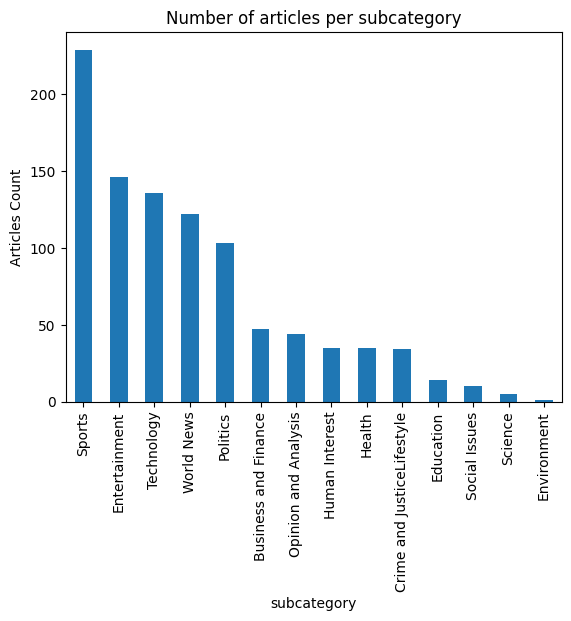

In [65]:
#create bar plot to visualize frequency of each subcategory
df_news['subcategory'].value_counts().plot(kind='bar', 
                                   xlabel='subcategory', 
                                   ylabel='Articles Count', 
                                   rot=90, 
                                   title='Number of articles per subcategory')